# Self-Driving Car Engineer Nanodegree

# Project: CarND Capstone - Build a Traffic Light Classifier

In [1]:
#1
import cv2
import os
import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.contrib.layers import flatten

In [2]:
#2 
# GPU Test
# Uncomment to test for GPU
'''
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)

# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

# Runs the op.
print(sess.run(c))

print()

# Creates a graph
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
    
# Runs the op.
with tf.Session() as sess:
    print (sess.run(c))

'''

"\n# Creates a graph.\na = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')\nb = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')\nc = tf.matmul(a, b)\n\n# Creates a session with log_device_placement set to True.\nsess = tf.Session(config=tf.ConfigProto(log_device_placement=True))\n\n# Runs the op.\nprint(sess.run(c))\n\nprint()\n\n# Creates a graph\nwith tf.device('/gpu:0'):\n    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')\n    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')\n    c = tf.matmul(a, b)\n\n# Creates a session with log_device_placement set to True.\nsess = tf.Session(config=tf.ConfigProto(log_device_placement=True))\n    \n# Runs the op.\nwith tf.Session() as sess:\n    print (sess.run(c))\n\n"

# Load All Images

In [3]:
#3
# Load all images

# Generate path to image folders
p = '/Users/root/CarND-Capstone-Classifier/CarND-Traffic-Sign-Classifier-Project/tl-data/171009/'
path = []
for i in range(4):
  path.append(p + str(i) + '/')  

X = []
Y = []

# Load all images
for i in range(4):
    for img_file in glob.glob(os.path.join(path[i], '*.jpg')):
        image = cv2.imread(img_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        X.append(image)
        Y.append(i)




# Display Samle Images from Dataset

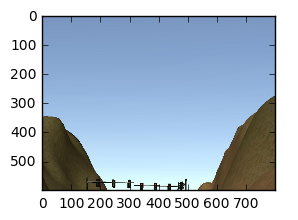

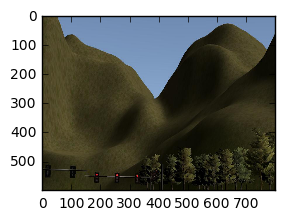

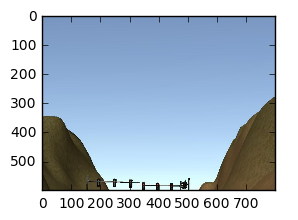

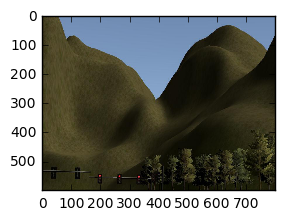

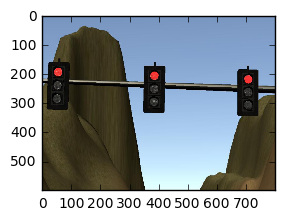

In [4]:
#4

# Plot sample images
plt.figure(figsize=(3,3))
plt.imshow(X[1])
plt.show()


# Plot sample images
plt.figure(figsize=(3,3))
plt.imshow(X[3])
plt.show()

# Plot sample images
plt.figure(figsize=(3,3))
plt.imshow(X[5])
plt.show()

# Plot sample images
plt.figure(figsize=(3,3))
plt.imshow(X[7])
plt.show()

# Plot sample images
plt.figure(figsize=(3,3))
plt.imshow(X[9])
plt.show()



# Pre-process the Data Set (normalization, grayscale, etc.)

In [24]:
#5
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.

#Convert to numpy array
#X = numpy.zeros(shape=(600,800,3))
X = np.asarray(X)

#Grayscale conversion
#No greyscaling

#Scale features to be in [0, 1]
X = ((X - 128.0)/ 128.0)


# Shuffle images *****************************************************************************************
# Will be replaced with another type of shuffle (not sklearn, maybe numpy)
#from sklearn.utils import shuffle
#X_train, Y_train = shuffle(X_train, Y_train, random_state=0)
# ********************************************************************************************************
'''
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


X, Y = unison_shuffled_copies(X, Y)
'''

MemoryError: 

# Split into Training and Test Sets

In [28]:
#6
X_train = X
Y_train = Y
X_test = X
Y_test = Y






# Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [17]:
#7

# Basic summary dat
### Training set, test set and cross validation set

# What's the shape of an traffic light image?
image_shape = X_train[0].shape

#Training set, test set and validation set
n_train = len(X_train)
n_test = len(X_test)
#n_valid = len(X_valid)

#Unique labels
n_train_classes = len(set(Y_train))
n_test_classes = len(set(Y_test))
#n_valid_classes = len(set(valid['labels']))

#Sample percentages
n_total = n_train + n_test #+ n_valid 
pn_train = n_train *100.0/n_total 
pn_test = n_test * 100.0/n_total 
#pn_valid = n_valid *100.0/n_total 

print("Image data shape =", image_shape)
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
#print("Number of cross validation examples =", n_valid)
print("Total number of examples =", n_total)
print()
print("Percentage of training examples  =", pn_train)
print("Percentage of test examples  =", pn_test)
#print("Percentage of cross validation examples  =", pn_valid)

print()
print("Number of classes in training set =", n_train_classes)
print("Number of classes in test set =", n_test_classes)
#print("Number of classes in cross validation  =", n_valid_classes)

#A count of the # images in each class for each dataset
from collections import Counter

group_by_id = Counter(Y_train)
print()
print('Number of traffic signs in the training set for each ClassId in descending order...')
print(group_by_id.most_common())
print()

group_by_id = Counter(Y_test)
print()
print('Number of traffic signs in the test set for each ClassId in descending order...')
print(group_by_id.most_common())
print()

#group_by_id = Counter(y_valid)
print()
#print('Number of traffic signs in the cross validation set for each ClassId in descending order...')
#print(group_by_id.most_common())
print()


Image data shape = (600, 800, 3)
Number of training examples = 1195
Number of testing examples = 1195
Total number of examples = 2390

Percentage of training examples  = 50.0
Percentage of test examples  = 50.0

Number of classes in training set = 4
Number of classes in test set = 4

Number of traffic signs in the training set for each ClassId in descending order...
[(0, 722), (3, 228), (2, 185), (1, 60)]


Number of traffic signs in the test set for each ClassId in descending order...
[(0, 722), (3, 228), (2, 185), (1, 60)]





# Model Architecture

In [18]:
#8
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    logits =  0
    
    # Layer 1: Layer 1: Convolutional. Input = 600x800x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(100, 100, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[100, 100, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Flatten. Input = ???. Output = ???.
    fc0   = flatten(conv1)
    
    # Layer 2: Fully Connected. Input = 1000. Output = 100.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(25236, 100), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(100))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Layer 3: Fully Connected. Input = 100. Output = 4.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(100, 4), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(4))
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    
    return logits


# Train, Validate and Test the Model

In [19]:
#9
## 

# Training Parameters
EPOCHS = 1
BATCH_SIZE = 64

#Features and labels for TensorFlow
x = tf.placeholder(tf.float32, (None, 600, 800, 3))
y = tf.placeholder(tf.int32, (None))

#One hot encoding of labels
one_hot_y = tf.one_hot(y, 4)


In [20]:
#10
# Training pipeline

# Learning rate
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [21]:
#11
# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [29]:
#12
### Train model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        # X_train, Y_train = shuffle(X_train, Y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], Y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, Y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
                
    saver.save(sess, './lenet')
    print("Model saved")



Training...



InvalidArgumentError: Current implementation does not yet support strides in the batch and depth dimensions.
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[100, 100, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_Placeholder_0/_11, Variable/read)]]

Caused by op 'Conv2D', defined at:
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Program Files\Anaconda3\lib\site-packages\traitlets\config\application.py", line 653, in launch_instance
    app.start()
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Program Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Program Files\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-418fb1eefa74>", line 7, in <module>
    logits = LeNet(x)
  File "<ipython-input-18-0728ef379853>", line 14, in LeNet
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[100, 100, 1, 1], padding='VALID') + conv1_b
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_nn_ops.py", line 396, in conv2d
    data_format=data_format, name=name)
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Program Files\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Current implementation does not yet support strides in the batch and depth dimensions.
	 [[Node: Conv2D = Conv2D[T=DT_FLOAT, data_format="NHWC", padding="VALID", strides=[100, 100, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/gpu:0"](_recv_Placeholder_0/_11, Variable/read)]]


In [ ]:
#14
# Test accuracy - Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

In [ ]:
#15
# Train accuracy - Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))